In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
export_data = pd.read_csv('tweets.csv')

# Display the first few rows of the dataset
export_data.head()

,Tweet ID,Created At,Tweet Text
0,1868291025216876978,2024-12-15 13:44:26+00:00,😂😂 https://t.co/6Lk2zWDTst
1,1858807689276518790,2024-11-19 09:41:02+00:00,https://t.co/gMmty6zb1r https://t.co/gyPz1weS5Q
2,1857522245796770254,2024-11-15 20:33:09+00:00,"Generated by Grok, city on moon\n\nGrok\nChatG..."
3,1856113954755399954,2024-11-11 23:17:06+00:00,https://t.co/Ofhr32QcBC https://t.co/OPvv2w4f0M
4,1856113876632219963,2024-11-11 23:16:47+00:00,RT @Osmanede_: Çekimi sana ait bir sonbahar fo...


In [12]:
export_data = export_data.dropna(subset=['Tweet Text'])
export_data.reset_index(drop=True, inplace=True)
export_data.head()

,Tweet ID,Created At,Tweet Text
0,1868291025216876978,2024-12-15 13:44:26+00:00,😂😂 https://t.co/6Lk2zWDTst
1,1858807689276518790,2024-11-19 09:41:02+00:00,https://t.co/gMmty6zb1r https://t.co/gyPz1weS5Q
2,1857522245796770254,2024-11-15 20:33:09+00:00,"Generated by Grok, city on moon\n\nGrok\nChatG..."
3,1856113954755399954,2024-11-11 23:17:06+00:00,https://t.co/Ofhr32QcBC https://t.co/OPvv2w4f0M
4,1856113876632219963,2024-11-11 23:16:47+00:00,RT @Osmanede_: Çekimi sana ait bir sonbahar fo...


C:\Users\ahayd\AppData\Local\Temp\ipykernel_2676\3208809375.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  export_data['Month'] = export_data['Created At'].dt.to_period('M')


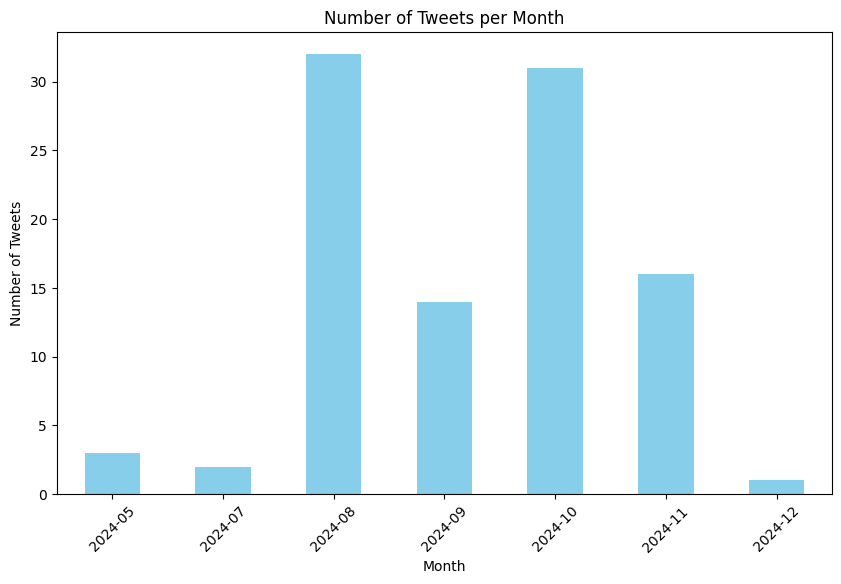

In [13]:
# Convert 'Created At' to datetime
export_data['Created At'] = pd.to_datetime(export_data['Created At'])

# Extract month and year from 'Created At'
export_data['Month'] = export_data['Created At'].dt.to_period('M')

# Calculate monthly tweet counts
monthly_tweet_counts = export_data['Month'].value_counts().sort_index()

# Plot the monthly tweet counts
monthly_tweet_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [15]:
import predict
import joblib

model = joblib.load('../models/Logistic Regressor.pkl') 
vectorizer = joblib.load('../models/vectorizer.pkl')

In [16]:


# Apply the function to each tweet
export_data['Sentiment'] = export_data['Tweet Text'].apply(lambda x: predict.predict_sentiment(x, model=model, vectorizer=vectorizer))

# Display the updated dataframe
export_data.head()

,Tweet ID,Created At,Tweet Text,Month,Sentiment
0,1868291025216876978,2024-12-15 13:44:26+00:00,😂😂 https://t.co/6Lk2zWDTst,2024-12,"(Neutral, 83.77308455722279)"
1,1858807689276518790,2024-11-19 09:41:02+00:00,https://t.co/gMmty6zb1r https://t.co/gyPz1weS5Q,2024-11,"(Neutral, 83.77308455722279)"
2,1857522245796770254,2024-11-15 20:33:09+00:00,"Generated by Grok, city on moon\n\nGrok\nChatG...",2024-11,"(Neutral, 86.79082572305082)"
3,1856113954755399954,2024-11-11 23:17:06+00:00,https://t.co/Ofhr32QcBC https://t.co/OPvv2w4f0M,2024-11,"(Neutral, 83.77308455722279)"
4,1856113876632219963,2024-11-11 23:16:47+00:00,RT @Osmanede_: Çekimi sana ait bir sonbahar fo...,2024-11,"(Neutral, 83.5873432662604)"


In [17]:
# Define a function to classify sentiment
def classify_sentiment(sentiment):
    score = sentiment[1]
    if score > 80:
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to the 'Sentiment' column
export_data['Sentiment_Label'] = export_data['Sentiment'].apply(classify_sentiment)

# Display the updated dataframe
export_data.head()

,Tweet ID,Created At,Tweet Text,Month,Sentiment,Sentiment_Label
0,1868291025216876978,2024-12-15 13:44:26+00:00,😂😂 https://t.co/6Lk2zWDTst,2024-12,"(Neutral, 83.77308455722279)",Positive
1,1858807689276518790,2024-11-19 09:41:02+00:00,https://t.co/gMmty6zb1r https://t.co/gyPz1weS5Q,2024-11,"(Neutral, 83.77308455722279)",Positive
2,1857522245796770254,2024-11-15 20:33:09+00:00,"Generated by Grok, city on moon\n\nGrok\nChatG...",2024-11,"(Neutral, 86.79082572305082)",Positive
3,1856113954755399954,2024-11-11 23:17:06+00:00,https://t.co/Ofhr32QcBC https://t.co/OPvv2w4f0M,2024-11,"(Neutral, 83.77308455722279)",Positive
4,1856113876632219963,2024-11-11 23:16:47+00:00,RT @Osmanede_: Çekimi sana ait bir sonbahar fo...,2024-11,"(Neutral, 83.5873432662604)",Positive


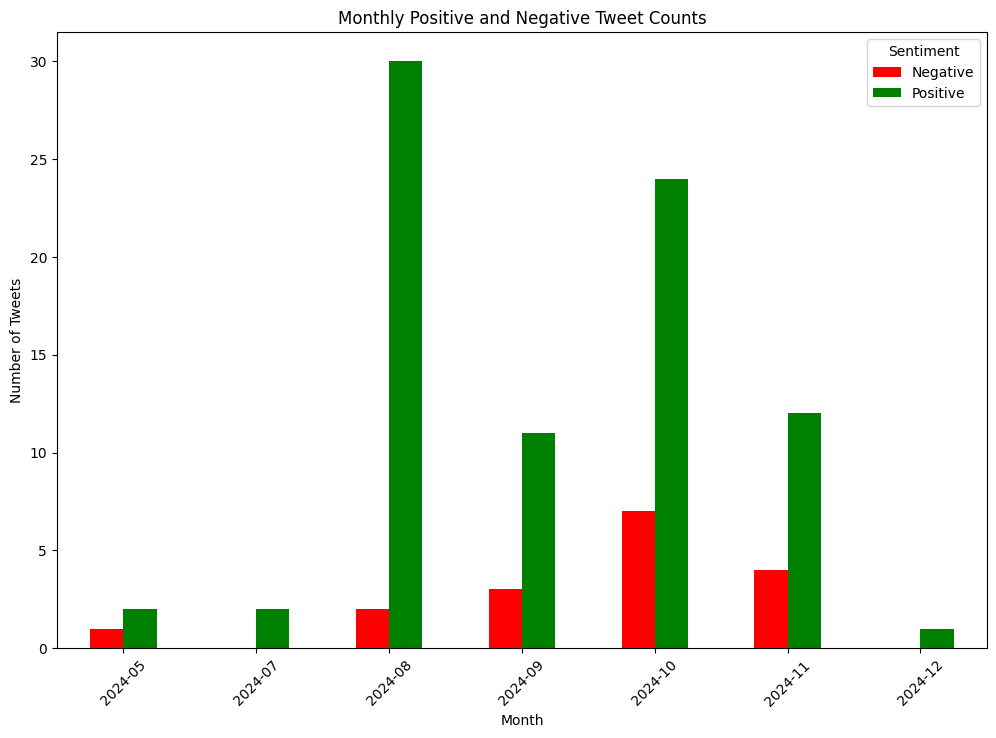

In [19]:
# Group by 'Month' and 'Sentiment_Label' and count the occurrences
monthly_sentiment_counts = export_data.groupby(['Month', 'Sentiment_Label']).size().unstack(fill_value=0)

# Plot the monthly sentiment counts with bars side by side
monthly_sentiment_counts.plot(kind='bar', figsize=(12, 8), color=['red', 'green'])
plt.title('Monthly Positive and Negative Tweet Counts')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()